The following demonstrates the ad-hoc data loading capabilities of the dunnhumbydatawarehouse file

In [1]:
from database import engine, get_db
from my_url import _SQLALCHEMY_DATABASE_URL
from dunnhumby_data_warehouse import DunnHumbyDataWarehouse
import pandas as pd 
a = DunnHumbyDataWarehouse()

2024-01-22 23:48:24,720 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-22 23:48:24,720 INFO sqlalchemy.engine.Engine COMMIT
2024-01-22 23:48:27,121 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-22 23:48:27,121 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-01-22 23:48:27,121 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-22 23:48:27,121 INFO sqlalchemy.engine.Engine ROLLBACK
2024-01-22 23:48:37,737 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-22 23:48:37,737 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-01-22 23:48:37,737 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-22 23:48:37,737 INFO sqlalchemy.engine.Engine ROLLBACK
table campaign_desc is up to date
table campaign_table is up to date
table causal_data is up to date
table coupon is up to date
table coupon_redempt

### Daily Household Spending

In [3]:
a.get_table('daily_hh_spend')

,index,day,household_key,alcohol,beverages,concessions,dairy,drug,garden,grain_goods,grocery,home_family,junk_food,kitchen,meat,misc,produce,seasonal,total_sales
0,0,101,1,0.0,7.34,0.00,4.77,0.0,0.0,10.48,0.00,12.18,10.91,0.00,6.27,1.50,0.00,0.00,53.45
1,1,101,8,0.0,0.00,7.99,6.31,0.0,0.0,0.00,0.00,0.00,1.00,0.33,1.09,1.94,0.00,0.00,18.66
2,2,101,13,0.0,0.00,0.00,2.79,0.0,0.0,0.00,0.00,0.00,12.50,0.00,0.00,0.00,0.00,27.73,43.02
3,3,101,24,0.0,0.00,0.00,3.99,0.0,0.0,10.00,0.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,39.99
4,4,101,35,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,7.60,0.00,0.00,0.00,0.00,0.00,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198323,198323,708,2400,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,19.48,1.00,0.00,0.00,0.00,0.00,0.00,20.48
198324,198324,708,2460,0.0,0.00,0.00,0.00,0.0,0.0,0.00,10.97,12.99,0.00,0.00,0.00,0.00,0.00,0.00,23.96
198325,198325,708,2471,0.0,0.00,0.00,2.39,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.67,0.00,0.00,0.00,4.06
198326,198326,708,2483,0.0,3.19,0.00,14.14,0.0,0.0,30.18,0.00,19.78,19.55,5.99,4.48,0.00,19.34,0.00,116.65


In [4]:
daily_hh_spend = a.get_table('daily_hh_spend')

In [15]:
temp = daily_hh_spend[daily_hh_spend['household_key']==1].set_index('day', drop=True)


In [19]:
import matplotlib.colors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

<Axes: xlabel='day'>

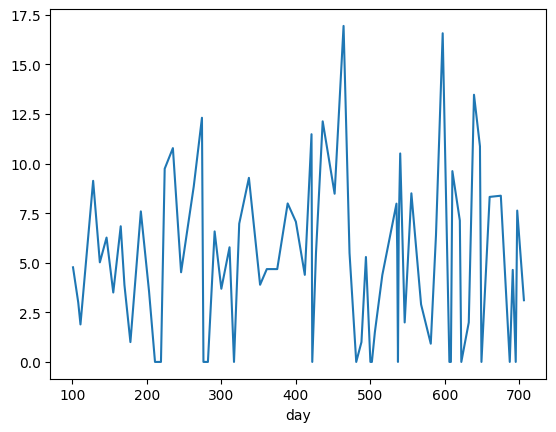

In [17]:

temp[['concessions', 'dairy']].sum(axis=1).plot()

In [4]:
a.add_datetime(daily_hh_spend, column='day')

<Axes: title={'center': 'Daily Sales Totals for Household 1'}, xlabel='datetime'>

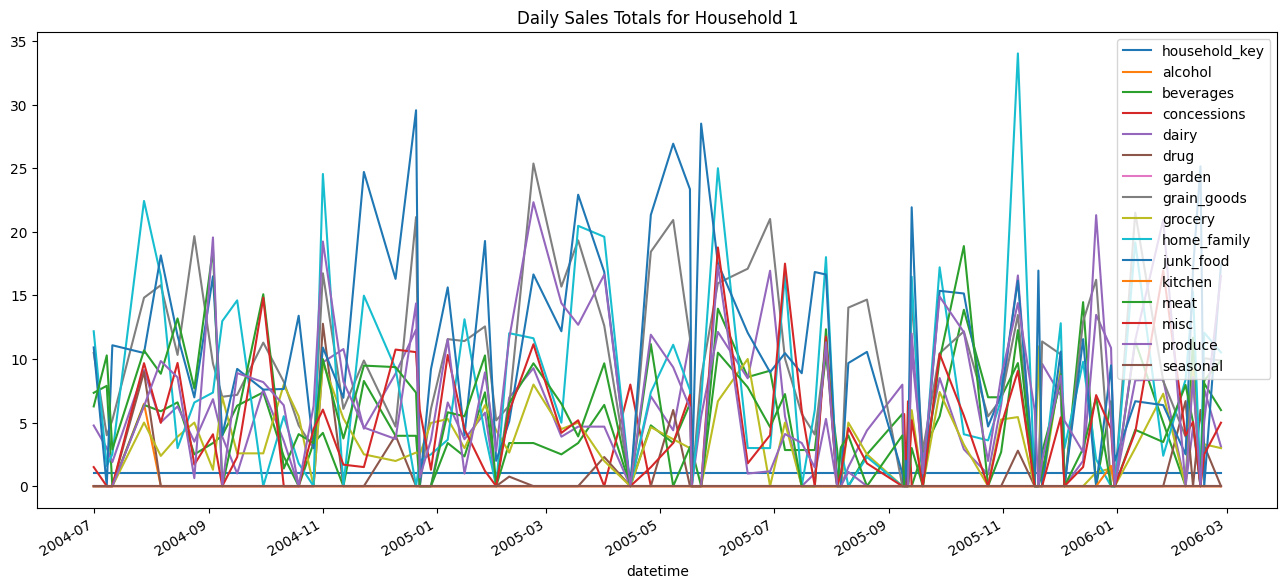

In [9]:
hh_key = 1
daily_hh_spend[daily_hh_spend['household_key']==hh_key].drop(['index','day', 'total_sales'], axis=1).set_index('datetime', drop=True).plot(title=f'Daily Sales Totals for Household {hh_key}', figsize=(16,7))

### Daily Campaign Sales

In [7]:
all_campaign_sales = a.get_table('daily_campaign_sales')

In [27]:
import matplotlib.pyplot as plt

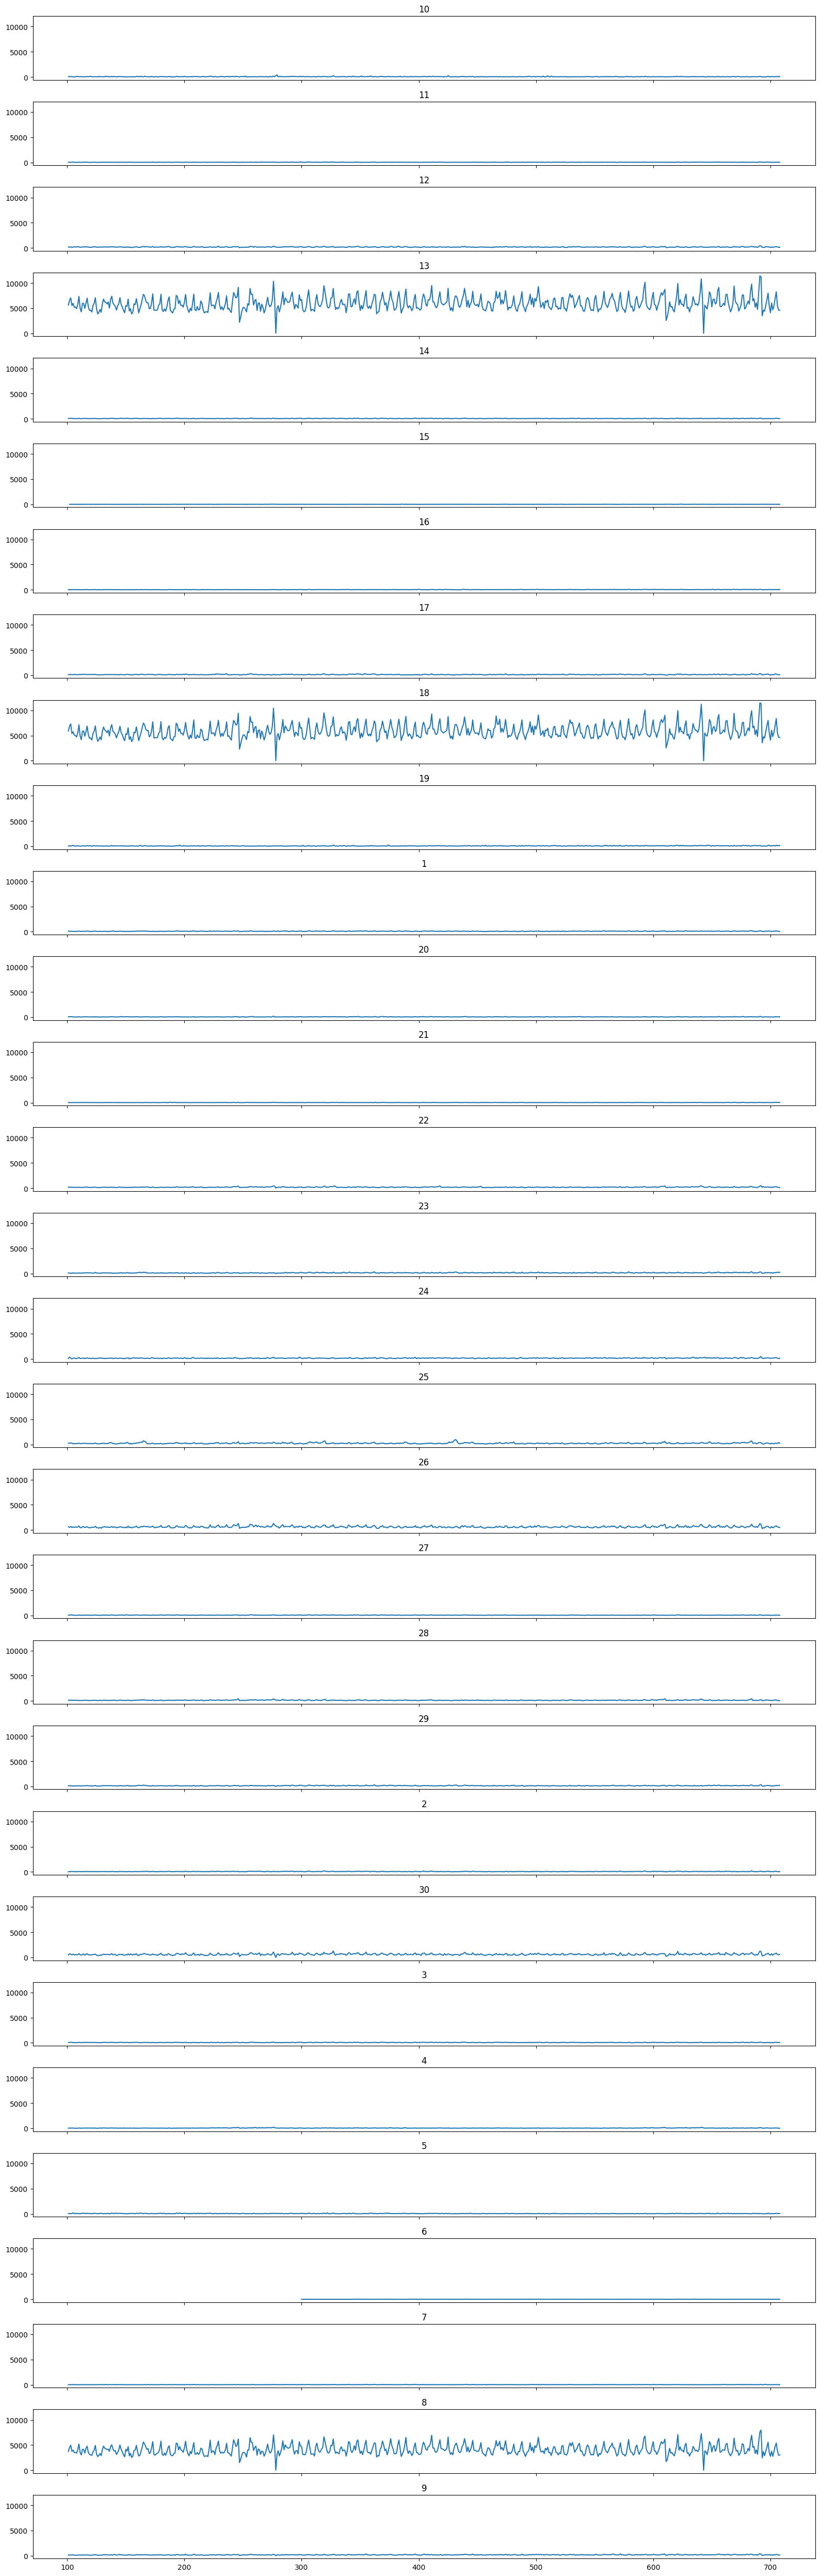

In [35]:
all_campaigns = all_campaign_sales['campaign_id'].unique()

fig, axs = plt.subplots(len(all_campaigns), figsize=(16, 50), sharex=True, sharey=True)
for plotnum, campaign_id in enumerate(all_campaigns):
    axs[plotnum].plot(all_campaign_sales[all_campaign_sales['campaign_id']==campaign_id][['day', 'sales_value']].set_index('day'))
    axs[plotnum].set_title(f'{campaign_id}')
fig.tight_layout()

### Household Summary Table

In [5]:
a.get_table('hh_summary')

,index,household_key,age_45_plus,income_50K_plus,single_couple_family,has_kids,single,couple,r_score,f_score,...,grain_goods,grocery,home_family,junk_food,kitchen,meat,misc,produce,seasonal,total_sales
0,0,1,1,0,2,0,0,1,5,3,...,668.41,230.24,537.29,764.02,1.59,379.04,303.82,477.82,0.00,4120.07
1,1,7,1,1,2,0,0,1,5,3,...,248.84,141.06,648.67,248.54,0.00,616.74,191.86,371.61,13.46,3170.21
2,2,8,0,0,3,1,0,0,5,4,...,427.40,213.37,901.81,389.36,34.68,956.70,379.84,545.26,15.98,5075.29
3,3,13,0,1,3,1,0,0,5,5,...,611.88,229.27,2771.53,829.34,18.71,604.16,764.12,578.87,70.93,8701.99
4,4,16,1,1,1,0,1,0,4,3,...,279.85,73.24,72.17,127.63,8.07,224.09,137.36,90.22,0.00,1224.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,796,2494,0,1,2,0,0,1,5,1,...,150.75,108.10,281.83,292.02,0.00,374.05,139.68,280.89,1.00,2007.99
797,797,2496,1,1,3,1,0,0,4,2,...,321.16,103.29,424.82,360.46,7.48,1587.79,358.50,332.36,1.79,4015.65
798,798,2497,1,0,1,0,1,0,4,5,...,570.01,350.91,868.09,832.75,3.99,1560.83,529.81,940.00,23.47,6792.55
799,799,2498,0,1,2,0,0,1,5,5,...,319.38,145.57,262.77,252.69,0.00,305.32,128.00,228.36,0.00,2524.85


In [ ]:
# startup the API server using `uvicorn main:app --reload` in the shell

# Derived Tables

The code below is being adapted from previous work I did on DunnHumby. 

Because of the data coming out of the db now, some column names need to be lowercased.

The operations below represent a complex combination of data cleaning steps and table joins; there's way too much going on

## DAILY HH SPEND

In [ ]:
df = pd.read_csv('data/daily_hh_spend.csv')
df.columns = [x.lower() for x in df.columns]
for x in df.columns[2:]:
    df[x] = df[x].round(2) 
df.to_csv('data/daily_hh_spend.csv')

df.to_sql(name='daily_hh_spend',
                con=_SQLALCHEMY_DATABASE_URL,
                #  if_exists='append',
                if_exists='replace',
                chunksize=999,
                method='multi')

In [ ]:
# Transforming TRANSACTION DATA AND PRODUCT


import datetime as dt
import pandas as pd
import numpy as np



# def hh_summary_create():
# TODO:  ### consider dropping unnecessary columns
### this currently rips directly from the data source, making the data lake obsolete
### 


### TRANSACTION DATA

transactions = a.get_table('transaction_data')
#pd.read_csv('data/transaction_data.csv')
#self.get_table('transaction_data')

transactions = transactions.drop('index',axis=1)

# add datetime values. this should be back-integrated with the data ingestion procedure, now that we have it
day1 = dt.datetime(2004, 3, 23) # as derived in transactions notebook; datetime for 'DAY' == 1
ineedthismany = transactions['DAY'].max()
last = day1 + dt.timedelta(days=int(ineedthismany))
date_range = pd.date_range(day1, last) # date range for our data
# map datetime index to DAY; enumerate() indexes from 0, so we add 1
date_map = {i+1:x for i, x in enumerate(date_range)}
# truncate data

output = transactions['TRANS_TIME'].astype(str).str.zfill(4)
# split to hours and minutes
hours = output.str[:2]
minutes = output.str[2:]

# convert to timedelta
hours = pd.to_timedelta(hours.astype('int'), unit='hour')
minutes = pd.to_timedelta(minutes.astype('int'), unit='minute')
time_of_transaction = hours + minutes

# add date and time
transactions['datetime'] = transactions['DAY'].map(date_map) + time_of_transaction



### todo: remove unnecessary columns? --> DAY is used by streamlit_front/campaign_performance, etc.
#transactions.drop(['DAY', 'TRANS_TIME'], axis=1)

# filtering empty sales rows..
transactions = transactions.loc[(transactions['QUANTITY'] > 0) & 
                (transactions['SALES_VALUE'] > 0)]


# filtering on datetime (data acquisition inconsistency?)
transactions = transactions[(transactions['datetime'] >= "2004-7-1") &
                (transactions['datetime'] < "2006-3-1")]




###  PRODUCT 
prod = a.get_table('product')
#pd.read_csv('../data/product.csv')
prod.drop('index', axis=1, inplace=True)

merged = transactions.merge(prod.drop('CURR_SIZE_OF_PRODUCT', axis=1), on='PRODUCT_ID')


# Remove Gasoline Sales
merged.drop(merged[merged['SUB_COMMODITY_DESC']=='GASOLINE-REG UNLEADED'].index, axis=0, inplace=True)
merged.drop(merged[merged['COMMODITY_DESC']=='GASOLINE-REG UNLEADED'].index, axis=0, inplace=True)

# Add section labels
with open('Section_Labels.txt', 'r') as f:
    product_section_map = eval(f.readlines()[0])
ser = merged['COMMODITY_DESC'].map(product_section_map) # hardcoded;
ser = ser.fillna('misc') # for exceptions ?

merged['Section Labels'] = ser

# Remove one-day transactions -- outliers?
def one_day_transactions(df) -> list:
    no_days = df.groupby('household_key').agg({'DAY':'nunique'})
    return list(no_days[no_days['DAY'] == 1].index)

# remove households with only 1 day of purchases;
merged = merged[~merged['household_key'].isin(one_day_transactions(merged))]    



In [ ]:

# write data using pandas (for now)
# merged.to_sql(name='_merged_no_hh',
#             con=_SQLALCHEMY_DATABASE_URL,
#             # if_exists='append',
#            if_exists='replace',
#             chunksize=999,
#             method='multi')
# HouseHold Analytics Pivot

### Creating Customer-Level Sales by Section Labels
section_dummies = pd.get_dummies(merged['Section Labels'])
#print(section_dummies.sum().sum())
# the transaction-level (item) binary flags for
#section_dummies.sum()

### total sales by section, for each household
### may want to break this out further, into ie. weekly, bi-weekly, monthly, or quarterly sales totals for each section
section_sales = section_dummies.apply(lambda x : x * merged['SALES_VALUE'])
daily_hh_spend_by_section = section_sales.join(merged[['household_key', 'DAY',]])
daily_hh_spend_by_section

daily_hh_spend_by_section =daily_hh_spend_by_section.groupby(['DAY','household_key', ]).agg({col:'sum' for col in section_dummies.columns})

daily_hh_spend_by_section
daily_hh_spend_by_section['total_sales'] = daily_hh_spend_by_section.sum(axis=1)

,alcohol,beverages,concessions,dairy,drug,garden,grain_goods,grocery,home_family,junk_food,kitchen,meat,misc,produce,seasonal,household_key,DAY
0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.79,0.0,2319,101
1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.72,0.0,243,102
2,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.35,0.0,707,103
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.10,0.0,329,103
4,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.0,1029,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404767,0.0,0.0,0.0,0.0,0.0,0.00,1.76,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2384,708
2404768,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2.5,0.0,0.00,0.0,2347,708
2404769,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.5,2280,708
2404770,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.5,0.0,0.00,0.0,886,708


In [96]:
# data output

#daily_hh_spend_by_section.to_csv('data/daily_hh_spend_by_section.csv')


# daily_hh_spend_by_section.to_sql(name='daily_hh_spend',
#             con=_SQLALCHEMY_DATABASE_URL,
#             # if_exists='append',
#            if_exists='replace',
#             chunksize=999,
#             method='multi')

198328

In [ ]:

# ADDING Recency, Frequency, Monetary SCORES

last_days = merged.groupby('household_key')['DAY'].max()
R = pd.cut(last_days, [0, 525, 615, 675, 700, np.inf], labels=[1,2,3,4,5], ordered=True).astype('int')
num_baskets = merged.groupby('household_key')['BASKET_ID'].nunique()
grouper = merged.groupby('household_key')['DAY']
days_in_data = grouper.max() - grouper.min() + 1 #(no day 0 in our data)
transactions_per_day = num_baskets/days_in_data
F = pd.qcut(transactions_per_day, 5, labels=[1,2,3,4,5]).astype('int')
M = pd.qcut(np.log(merged.groupby('household_key')['SALES_VALUE'].sum()), 5, labels=[1,2,3,4,5]).astype('int')
temp = pd.concat([R, F, M], axis=1)
temp.columns = ['r_score', 'f_score', 'm_score']
temp['rfm_score'] = temp.sum(axis=1).astype(int)
customer_ranks = pd.cut(temp['rfm_score'], bins=[0,6,9,13,15, np.inf], labels=[1,2,3,4,5], right=False).astype(int)
customer_ranks = pd.DataFrame(customer_ranks) ## THIS IS HACKY BRO
temp['rfm_bins'] = customer_ranks

hh_agg = temp.merge(hh_agg, on='household_key').reset_index()





# DEMOGRAPHIC DATA

demo = a.get_table('hh_demographic')

#pd.read_csv('../data/hh_demographic.csv')
## Alternate Mappings
demo['age_45_plus'] = demo['AGE_DESC'].map({ '19-24':0,
                                        '25-34':0,
                                        "35-44":0,
                                        '45-54':1,
                                        '55-64':1,
                                        '65+':1,
                                        })


demo['income_50K_plus'] = demo['INCOME_DESC'].map({
                        'Under 15K': 0,
                            '15-24K': 0,
                            '25-34K': 0,
                            '35-49K': 0,
                            '50-74K': 1,
                            '75-99K': 1,
                            '100-124K': 1,
                            '125-149K': 1,
                            '150-174K': 1,                   
                            '175-199K': 1,  
                            '200-249K': 1,
                            '250K+': 1,
                        })

# leaving household_size desc IN as a category; single, couple, 3+
demo['single_couple_family'] = demo['HOUSEHOLD_SIZE_DESC'].map({'1':1, '2':2, '3':3,'4':3,'5+':3})
#demo['single_couple_family'] = pd.Categorical(demo['single_couple_family'], 
#                                                [1,2,3,])


demo['has_kids'] = np.where((demo['HH_COMP_DESC'] == '1 Adult Kids') |
                            (demo['HH_COMP_DESC'] == '2 Adults Kids') |
                            (demo['HOUSEHOLD_SIZE_DESC'].isin(['3', '4', '5+'])),
                            1, 0)

demo['single'] =  np.where((demo['HH_COMP_DESC'] == 'Single Female') |
                            (demo['HH_COMP_DESC'] == 'Single Male') |
                            (demo['HOUSEHOLD_SIZE_DESC'] == '1'),
                            1, 0)

demo['couple'] =  np.where((demo['HH_COMP_DESC'] == '2 Adults No Kids'),
                            1, 0)

demo = demo.drop(['AGE_DESC', 'MARITAL_STATUS_CODE', 
            'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 
            'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'], axis=1)


# binary flags for low and high income; low and high age; based on distributions of values in a known data set?

hh_summary = demo.merge(hh_agg, on='household_key')

hh_summary
### HH_SUMMARY OUTPUT
# hh_summary.set_index('index', inplace=True)
# hh_summary.to_sql(name='hh_summary',
#                 con=_SQLALCHEMY_DATABASE_URL,
#             #      if_exists='append',
#                 if_exists='replace',
#                 #chunksize=999,
#                 method='multi')

# hh_summary.to_csv('data/hh_summary.csv')

# Streamlit App Data Reconstruction

The streamlit apps I constructed previously depend on the result of various ETLs which were a part of my prior data processing workflow (the DTCJ python "package").

Creating a package of python functions which transform raw data into tangible insights was a great learning process over winter 2021/spring 2022; but the functionality I was looking for is much better served in a persisted database.

In the following cells I'll be simply porting the constructed data into the database; if it were necessary, I would create the data pipeline process once again.

I realize that this data warehouse is sort of patched together; but this has been yet another great learning experience for me. Getting hands on experience defining my own database schemas and API transaction models to power a front-end delivery is a completion of sorts in my data journey. 

While I still have a long ways to go in terms of implementing MLOps or DevOps procedures, I stand by my original assessment that basic analytics can answer many business questions -- and that to have reliable insights, one must ensure the quality of the data first.

In [ ]:
import pandas as pd
import glob

In [28]:
camp_desc = pd.read_csv('data/campaign_desc.csv').drop('DESCRIPTION', axis=1)

camp_desc = camp_desc.sort_values('CAMPAIGN').set_index('CAMPAIGN')

In [31]:
transactions = pd.read_csv('data/transaction_data.csv')
# transactions = transactions.drop('index',axis=1)


In [33]:
import datetime as dt
## ADDING DATETIME
# add datetime values. this should be back-integrated with the data ingestion procedure, now that we have it
day1 = dt.datetime(2004, 3, 23) # as derived in transactions notebook; datetime for 'DAY' == 1
ineedthismany = transactions['DAY'].max()
last = day1 + dt.timedelta(days=int(ineedthismany))
date_range = pd.date_range(day1, last) # date range for our data
# map datetime index to DAY; enumerate() indexes from 0, so we add 1
date_map = {i+1:x for i, x in enumerate(date_range)}
# truncate data
output = transactions['TRANS_TIME'].astype(str).str.zfill(4)
# split to hours and minutes
hours = output.str[:2]
minutes = output.str[2:]
# convert to timedelta
hours = pd.to_timedelta(hours.astype('int'), unit='hour')
minutes = pd.to_timedelta(minutes.astype('int'), unit='minute')
time_of_transaction = hours + minutes
# add date and time
transactions['datetime'] = transactions['DAY'].map(date_map) + time_of_transaction


In [34]:
# filtering empty sales rows..
transactions = transactions.loc[(transactions['QUANTITY'] > 0) & 
                (transactions['SALES_VALUE'] > 0)]
# filtering on datetime (data acquisition inconsistency?)
transactions = transactions[(transactions['datetime'] >= "2004-7-1") &
                (transactions['datetime'] < "2006-3-1")]



In [35]:

###  PRODUCT 
prod = pd.read_csv('data/product.csv')
#pd.read_csv('../data/product.csv')
# prod.drop('index', axis=1, inplace=True)
merged = transactions.merge(prod.drop('CURR_SIZE_OF_PRODUCT', axis=1), on='PRODUCT_ID')


In [36]:


### CLEANING BASED ON PRODUCT INFO
# Remove Gasoline Sales
merged.drop(merged[merged['SUB_COMMODITY_DESC']=='GASOLINE-REG UNLEADED'].index, axis=0, inplace=True)
merged.drop(merged[merged['COMMODITY_DESC']=='GASOLINE-REG UNLEADED'].index, axis=0, inplace=True)


In [37]:


### `COMMODITY_DESC` -> `Section Labels` MAP
# Add section labels
with open('Section_Labels.txt', 'r') as f:
    product_section_map = eval(f.readlines()[0])
ser = merged['COMMODITY_DESC'].map(product_section_map) # hardcoded;
ser = ser.fillna('misc') # for exceptions ?
merged['Section Labels'] = ser


In [38]:


# Remove one-day transactions -- outliers?
def one_day_transactions(df) -> list:
    no_days = df.groupby('household_key').agg({'DAY':'nunique'})
    return list(no_days[no_days['DAY'] == 1].index)

# remove households with only 1 day of purchases;
merged = merged[~merged['household_key'].isin(one_day_transactions(merged))]    



In [ ]:

# THIS FUNCTION HAS BEEN ALTERED
def make_date_map(df, dates='DAY'):
    # 'DAY' 1 == 2004-03-23
    day1 = datetime.datetime(2004, 3, 23) # as derived in transactions notebook; datetime for 'DAY' == 1
    #ineedthismany = df[dates].max()
    last = day1 + datetime.timedelta(days=int(999))
    date_range = pd.date_range(day1, last) # date range for our data
    # map datetime index to DAY; enumerate() indexes from 0, so we add 1
    date_map = {i+1:x for i, x in enumerate(date_range)}

    #output = df[dates].map(date_map)
    #output = pd.to_datetime(output)
    return date_map

In [ ]:
import datetime
date_map = make_date_map(df, dates='First Day')
#make_date_map(df, dates='Last Day')

In [42]:

# this table holds both a list of products, for each campaign; 
# it's unstructured data
desired = pd.read_csv('../streamlit-app/data/campaign_summary.csv', index_col=0)
desired.reset_index(names='campaign_id', inplace=True)
desired.head(2)

,campaign_id,First Day,Last Day,Duration,Listed Products,Section Label Counts,Listed Products Total Sales,Listed Products Sales Before,Listed Products Sales During,Listed Products Sales After,avg. total,avg. before,avg. during,avg. after,first,last
0,1,346,383,38,"[28929, 29096, 32387, 32805, 33198, 34180, 343...","{'dairy': 13496, 'produce': 7565, 'beverages':...",56764.87,21854.53,4145.12,30765.22,92.904861,88.839553,109.082105,93.511307,346.0,383.0
1,2,351,383,33,"[49910, 61481, 61509, 67573, 80730, 82937, 857...","{'produce': 5763, 'grocery': 2952, 'junk_food'...",47328.04,19708.03,2713.86,24906.15,77.459967,78.518048,82.238182,75.702584,351.0,383.0


In [ ]:
df['campaign_start_date'] = df['First Day'].map(date_map)

df['campaign_end_date'] = df['First Day'].map(date_map)

In [ ]:
df.to_csv('../data/campaign_summary.csv')

In [ ]:
#df = pd.read_csv('streamlit_frontends/household_analytics_table/data/hh_summary.csv')
# df1 = pd.read_csv()
    
# this table holds the total sales values for the products from each campaign; before, during, and after the campaign
df1 = pd.read_csv('streamlit_frontends/campaign_performance/data/campaign_sales.csv', index_col=0)
# df1

In [ ]:
df1

,total,before,during,after,first,last
1,93.445925,88.839553,109.082105,94.516140,346.0,383.0
2,78.007447,78.518048,82.238182,76.719331,351.0,383.0
3,70.839051,70.327734,77.519123,69.533900,356.0,412.0
4,57.659460,58.944632,56.312727,56.294383,372.0,404.0
5,48.305499,55.889928,52.226000,40.548970,377.0,411.0
6,3.272602,1.095358,4.718788,5.306272,393.0,425.0
7,23.316039,21.576309,21.755429,25.196143,398.0,432.0
8,4094.791391,4027.016442,4261.931020,4113.705516,412.0,460.0
9,175.363142,163.660060,183.994848,188.771143,435.0,467.0
10,62.125843,67.206006,53.849394,54.313733,463.0,495.0


In [ ]:

# proportion of sales by section; by campaign
# df2 = pd.read_csv('streamlit_frontends/campaign_performance/data/section_value.csv', index_col=0)
# #df2 = df2.T.reset_index(names='campaign_id')#
# df2 = df2.drop('sum', axis=0)
# df2


In [ ]:
## aggregate campaign-specific daily sales data

output = []
for x in glob.glob('streamlit_frontends/campaign_performance/data/camp_sales/*'):
    temp = pd.read_csv(x)
    camp_id = x.split('/')[-1].split('\\')[-1].split('_')[-2]
    temp['campaign_id'] = camp_id
    output.append(temp)

output = pd.concat(output)


In [ ]:
# daily campaign sales OUT
output.to_csv('../data/daily_campaign_sales.csv')

In [ ]:
output

,DAY,SALES_VALUE,campaign_id
0,101,63.77,10
1,102,93.07,10
2,103,89.46,10
3,104,49.88,10
4,105,26.88,10
...,...,...,...
602,704,164.03,9
603,705,272.35,9
604,706,192.88,9
605,707,131.86,9
